<a href="https://colab.research.google.com/github/00Pranay/MovieModel/blob/main/movie_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.778
Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.16      0.28        49
         Low       0.00      0.00      0.00       396
      Medium       0.78      1.00      0.87      1527

    accuracy                           0.78      1972
   macro avg       0.56      0.39      0.38      1972
weighted avg       0.62      0.78      0.68      1972



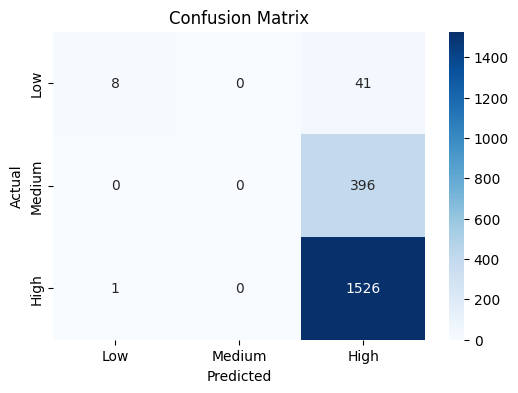

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = 'top_rated_movies.csv'
df = pd.read_csv(file_path)

# Preprocessing: Convert release_date to year
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df = df.dropna(subset=['release_year'])

# Convert vote_average into categories
bins = [0, 6, 8, 10]
labels = ['Low', 'Medium', 'High']
df['rating_category'] = pd.cut(df['vote_average'], bins=bins, labels=labels)

# Define features and target
X = df[['popularity', 'vote_count', 'release_year']]
y = df['rating_category']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print('Classification Report:')
print(class_report)

# Visualization - Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
